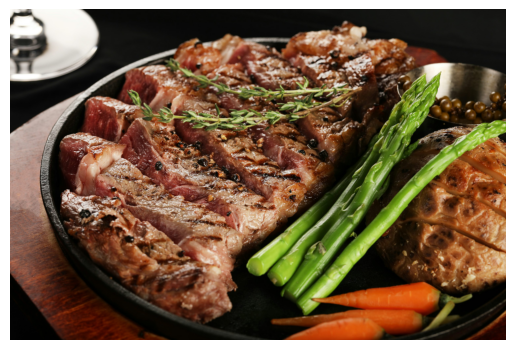

The F1 score is: 0.89
This advertisement does NOT violate company policy.


In [32]:
import pandas as pd
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as theImage
import matplotlib.pyplot as plt
import logging

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

# Builds a log file for monitoring the status of the program #
logging.basicConfig(filename="advertisments.log", level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")


# For parsing the data #
df = pd.read_csv('C964Harwood.csv')
logging.info("CSV file has been read")


# Check for missing values in the csv and remove the row #
df.isnull().sum()
df = df.dropna()


# Pulls a random url from the df list and displays the image #
# requests.get() utilizes Transport Layer Security to establish an HTTPS connection
try: 
    random_image_url = random.choice(df['URL'])
    response = requests.get(random_image_url)
    img = Image.open(BytesIO(response.content))
    theImage.imshow(img)
    theImage.axis('off')
    theImage.show()
except:
    print("Error loading image")
    logging.error("URL could not be resolved")


# Create lists from the CSV file: X removes the Violation and URL columns, y consists of only the violation column #
scores = df.drop(columns=['Violation', 'URL'])
results = df['Violation']


# Train the model, comparing the model's prediction with the actual result and yeild an F1 precision score #
scores_train, scores_test, results_train, results_test = train_test_split(scores, results, test_size=0.3, random_state=50)                                      
model = DecisionTreeClassifier()
model.fit(scores_train, results_train)
results_prediction = model.predict(scores_test)
logging.info("Model training complete.")

f1_accuracy_score = f1_score(results_test, results_prediction)
print(f"The F1 score is: {f1_accuracy_score:.2f}")


# Determines whether the policy is violated for a randomly generated image #
generated_image_violation = df[df['URL'] == random_image_url].drop(columns=['Violation', 'URL'])
generated_image_prediction = model.predict(generated_image_violation)
# print(generated_image_prediction)
if generated_image_prediction:
    print("This advertisement violates company policy!")
else:
    print("This advertisement does NOT violate company policy.")


# For new image user wants to test without an interface #
# image_to_predict = pd.DataFrame([[.0143, .35, .7839]], columns=scores.columns)

# predictions = model.predict(image_to_predict)
# print(predictions)
# if predictions:
#     print("This advertisement violates company policy!")
# else:
#     print("This advertisement does NOT violate company policy.")

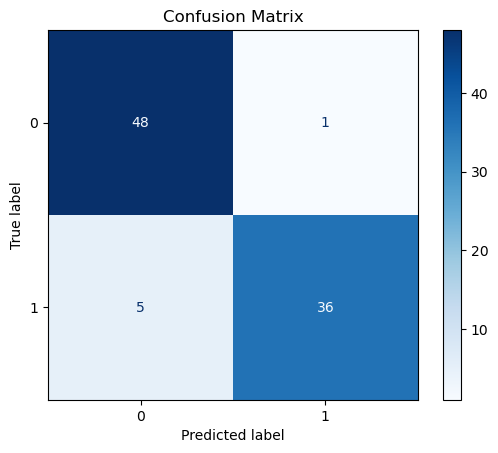

In [18]:
# Confusion Matrix as a visualization to show True and False positives and negatives #
cm = confusion_matrix(results_test, results_prediction)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

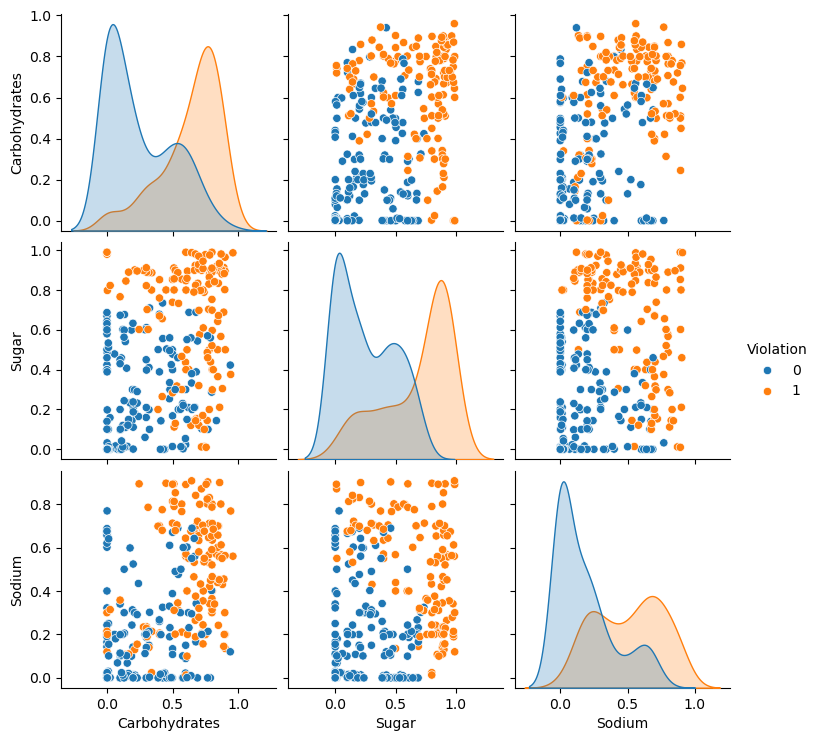

In [26]:
# Pairplot which showing how each characteristic relates to the other and the levels of each characteristic for violations and non-violations #
import seaborn as sns
sns.pairplot(df[["Carbohydrates", "Sugar", "Sodium", "Violation"]], hue="Violation")
plt.show()

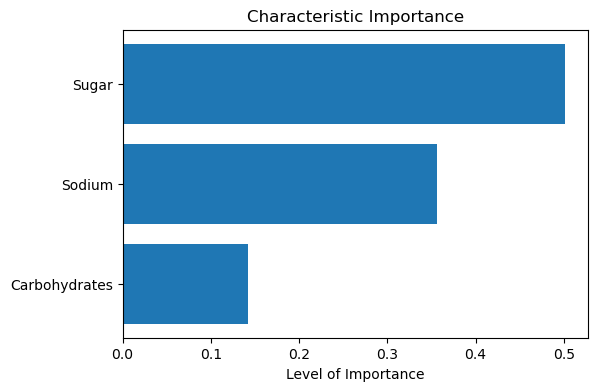

In [30]:
# Feature Importance Plot illustrates what impact each characteristic has on the model's predictions #
import numpy as np

features = model.feature_importances_
indices = np.argsort(features)
plt.figure(figsize=(6,4))
plt.title("Characteristic Importance")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), scores.columns[indices])
plt.xlabel("Level of Importance")
plt.show()

In [31]:
# Create user interface
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# creates text boxes for users to input float variables for each score #
user_carbs = widgets.FloatText(description="Carbs:")
user_sugar = widgets.FloatText(description="Sugar:")
user_sodium = widgets.FloatText(description="Sodium:")
output = widgets.Output()

# print(type(user_carbs.value))
df = pd.read_csv('C964Harwood.csv')
scores = df.drop(columns=['Violation', 'URL'])
results = df['Violation']
model = DecisionTreeClassifier()
scores_train, scores_test, results_train, results_test = train_test_split(scores, results, test_size=0.3, random_state=50)
model.fit(scores_train, results_train)

# Carbohydrates = float(user_carbs)
# Sugar = float(user_sugar)
# Sodium = float(user_sodium)

print("Enter the scores for the new advertisement below.")

# Method implemented when the predict button is clicked by the user #
def new_image_prediction(_):
    Carbohydrates = user_carbs.value
    Sugar = user_sugar.value
    Sodium = user_sodium.value

    with output:
        # If statement for input validation. Scores must be between zero and one
        if (Carbohydrates < 0 or Carbohydrates > 1) or (Sugar < 0 or Sugar > 1) or (Sodium < 0 or Sodium > 1):
            print("One of your values is out of range")
            logging.error("User input invalid value")

        else:
            user_values = pd.DataFrame([[Carbohydrates, Sugar, Sodium]], columns=scores.columns)
            prediction_for_user = model.predict(user_values)
            if prediction_for_user[0]:
                print("Based on the new advertisement's scores, this violates company policy.")
            else:
                print("Based on the new advertisement's scores, this will NOT violate company policy.")

# Creates a button which calls for a prediction from the model when clicked #
button_to_predict = widgets.Button(description="Predict")
button_to_predict.on_click(new_image_prediction)

# Shows the interface and its features to the user #
display(user_carbs, user_sugar, user_sodium, button_to_predict, output)

Enter the scores for the new advertisement below.


FloatText(value=0.0, description='Carbs:')

FloatText(value=0.0, description='Sugar:')

FloatText(value=0.0, description='Sodium:')

Button(description='Predict', style=ButtonStyle())

Output()